In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score,train_test_split
#数据集路径
data_path = 'sonar.all-data'
#读入数据集
df= pd.read_table(data_path,sep = ',+',header=None, engine='python')
#打印数据集标签统计数据
#数据第一列为数据的标签
print("lable")
print(df[60].value_counts())

#y为标签列
y = df[60]
#print(y)
#X为去掉标签列的数据
X = df.drop([60], axis=1)
#print(X)
print("X.shape", X.shape)
print("y.shape", y.shape)

#利用train_test_split方法，将X,y随机划分为训练集（train_data），训练集标签（train_labels），
#测试集（test_data），试集标签（test_labels），按训练集：测试集=1:9的概率划分
train_features,test_features, train_labels,test_labels= train_test_split(X, y, test_size=0.1, random_state=42)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)
print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

lable
M    111
R     97
Name: 60, dtype: int64
X.shape (208, 60)
y.shape (208,)
train_features (187, 60)
train_labels (187,)
test_features (21, 60)
test_labels (21,)


In [17]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-20
    for nearest_neighbor in range(1,int(208 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_knn_algorithm： brute
rel_weight： distance
rel_nearest_neighbor： 2


**********************Result**********************
Training time cost 0.0019931793212890625 s
Test time cost 0.0009720325469970703 s
knn_algorithm = brute ,nearest_neighbors = 2 ,weight = distance ,accuracy= 0.9047619047619048


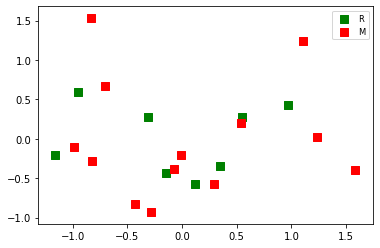

In [19]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')

    plt.legend(fontsize='small',labels=[ 'R','M'])  
    plt.savefig("knn-matplotlib-sonar.png")
    plt.show()
    
print('**********************Result**********************')
time_start = time.time()

#创建一个K临近算法的模板
clf = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

#fit函数 使用train_features作为训练数据，train_labels作为目标值（类似于标签）来拟合模型。
clf = clf.fit(train_features, train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')
time_start = time.time()

#调用predict函数进行预测
label_predict = clf.predict(test_features)
time_end = time.time()
print('Test time cost',time_end-time_start,'s')
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
#print(label_predict)
print('knn_algorithm =',rel_knn_algorithm,',nearest_neighbors =', rel_nearest_neighbor,',weight =',rel_weight,  ',accuracy=', accuracy)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit(X_pca[label_predict == 'R'],X_pca[label_predict == 'M'])

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

#以下代码用交叉验证的方法计算KNN在该数据集分类预测中的准确性
knn = KNeighborsClassifier(n_neighbors=1)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=train_features, y=train_labels, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: ['M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M'
 'R' 'R' 'M']
Correct_no: 19
Accuracy: 0.9047619047619048
Score_accuracy: 0.829706021811285
F1_score： 0.9047619047619048
precision： 0.9047619047619048
recall： 0.9047619047619048


In [2]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1
x = []
y = []
#nearest_neighbor参数范围为1-20
for nearest_neighbor in range(1,int(208* 0.1)):
    clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights='distance', algorithm='brute')
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    x.append(nearest_neighbor)
    y.append(accuracy)
    #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_nearest_neighbor = nearest_neighbor

print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_nearest_neighbor： 2


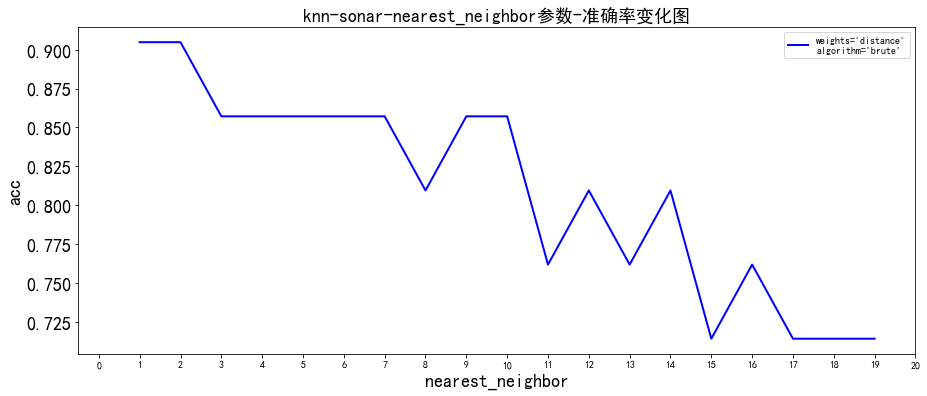

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='distance'\nalgorithm='brute'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
# plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("nearest_neighbor",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("knn-sonar-nearest_neighbor参数-准确率变化图",size=18) #图标题
plt.legend()  # 让图例生效
# # 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,20)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-sonar-nearest_neighbor参数选择图.png") #保存图
plt.show()  #显示图